## Graph partitioning

- Consider 𝐺 = (𝑉, 𝐸) with 𝑛 vertices
- A (𝑘,𝑣) balanced partition of 𝐺 assigns vertices into 𝑘 components of at most size 𝑣∙(𝑛÷𝑘) while minimizing the number of edges between each component
- Partitioning algorithms try to minimize/maximize an objective function (e.g. above implied objective function is something like the "total cut" total cut    
$ ∑_{𝑖<𝑗} 𝑤(𝐸_{𝑖𝑗}) $ where $E$ is the edge set, $w$ is the edge weight, and $i$ and $j$ are vertices.

## Node-swapping local search

Similar to pairwise exchange heuristic for Travelling Salesman Problem, a node-swapping local search method is a general iterative improvement heuristic for the graph partitioning problem.

Example algorithm:
1. Start with potential solution (random choice).
2. Swap a pair of vertices between the partitions, starting with an arbitrary vertex.
3. If they decrease objective function, keep the swap.
4. Iterative over all vertices untill all vertices have had one attempted swap. This is considered the end of the first "round".
4. Repeat rounds over all vertices in the graph, stopping when no swaps take place in a round.

Notes: This algorithm is typically slow to converge. It can be extended to give priority to swaps of particularly “good” nodes or by placing constraints on certain swaps (also see “tabu search”).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['figure.dpi'] = 300

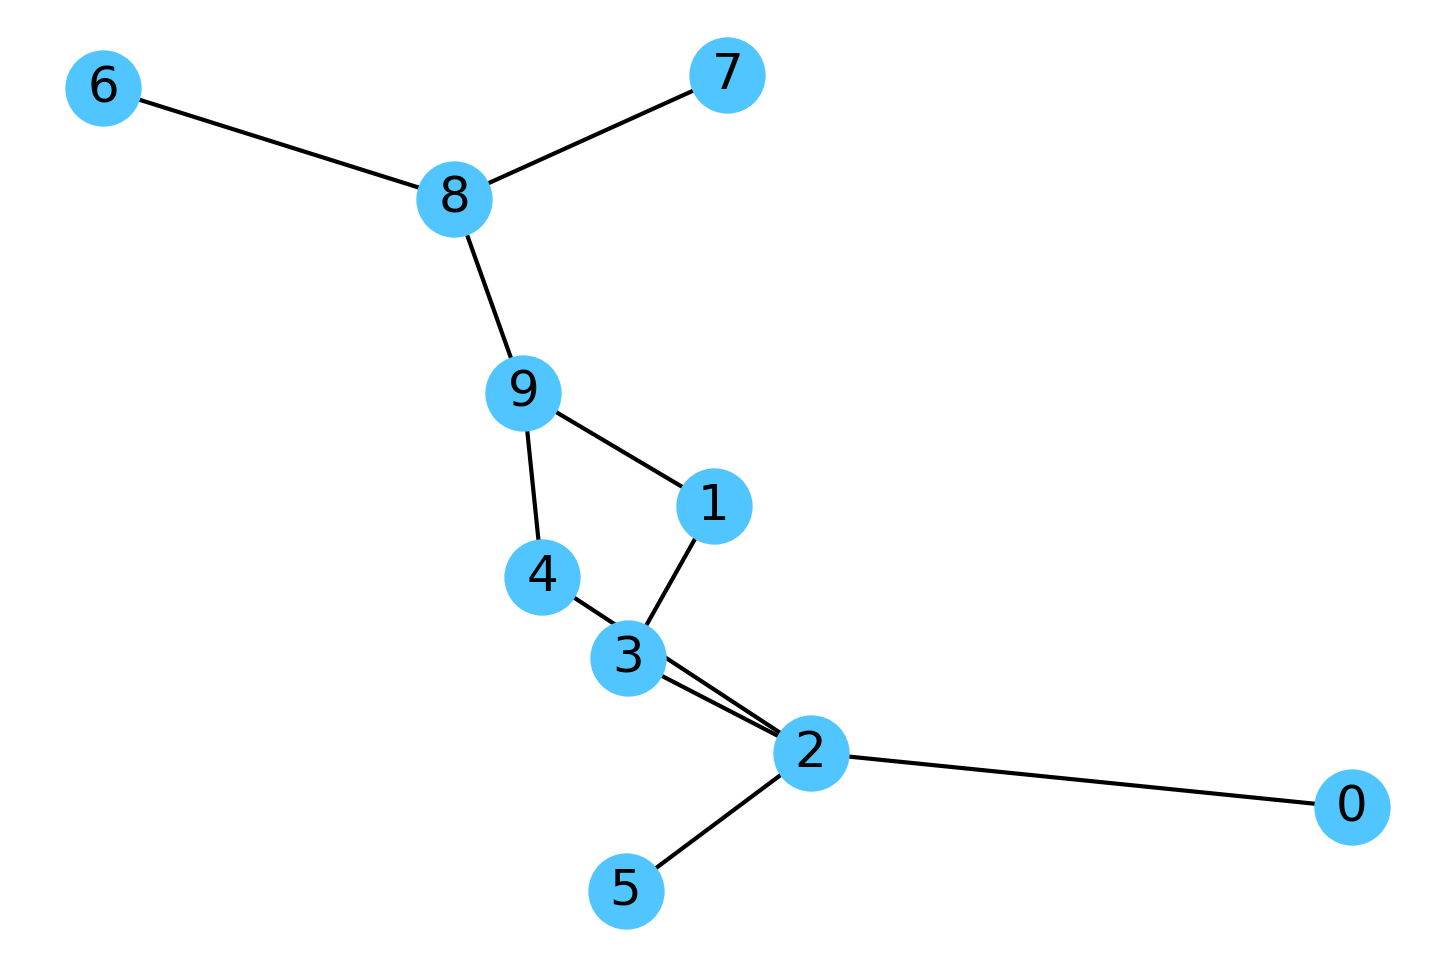

In [3]:
# generate and plot a graph

G_size = 10
G = nx.connected_watts_strogatz_graph(G_size, 3, 0.5)

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_color="#50C5FF") # nodes
nx.draw_networkx_edges(G, pos) # edges
nx.draw_networkx_labels(G, pos) # labels

plt.axis("off")
plt.show()

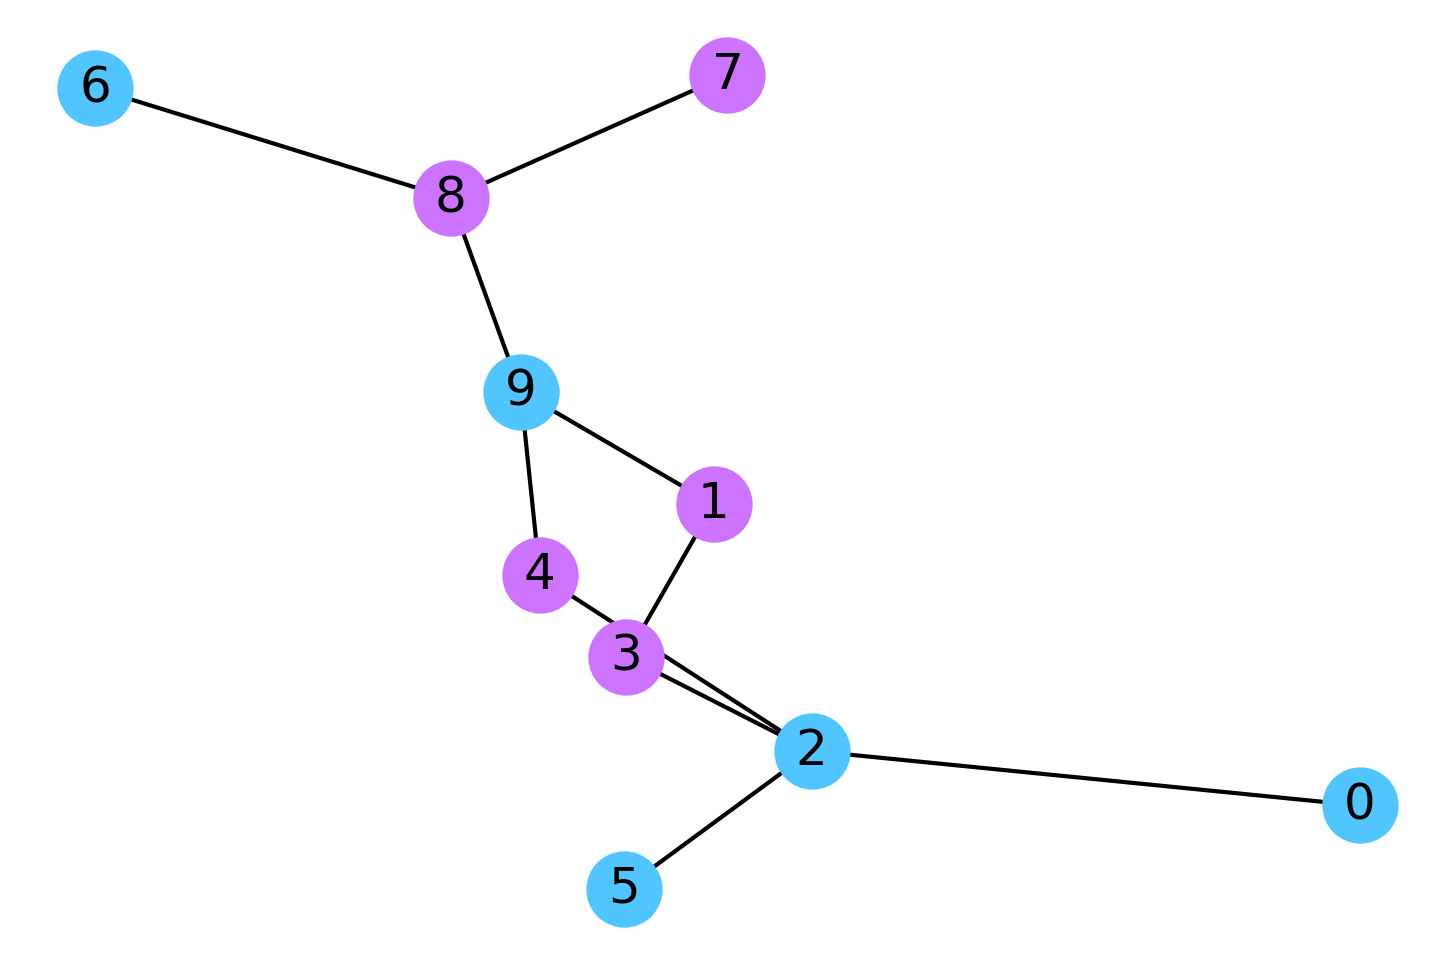

In [4]:
# randomly assign vertices to two partitions

V = list(range(0, G_size))
C1 = set(random.sample(V, round(G_size/2)))
C2 = set(V) - set(C1)

nx.draw_networkx_nodes(G, pos, nodelist=C1, node_color="#CC73FF") # C1 nodes
nx.draw_networkx_nodes(G, pos, nodelist=C2, node_color="#50C5FF") # C2 nodes
nx.draw_networkx_edges(G, pos) # edges
nx.draw_networkx_labels(G, pos) # labels

plt.axis("off")
plt.show()

In [5]:
def get_total_cut(G, A, B):
    total_cut = 0
    for i in list(A):
        total_cut += len(set(nx.neighbors(G, i)).intersection(B))
    return total_cut

In [6]:
global_best_cost = 999
converged = False

while not converged:
    local_best_swap_IDs = []
    local_best_swap_cost = 999

    for i in list(C1):    
        candidate_swap = random.choice(list(C2))

        candidate_C1 = set(C1)
        candidate_C1.remove(i)
        candidate_C1.add(candidate_swap)

        candidate_C2 = set(C2)
        candidate_C2.remove(candidate_swap)
        candidate_C2.add(i)

        swap_cost = get_total_cut(G, candidate_C1, candidate_C2)

        if swap_cost < local_best_swap_cost:
            local_best_swap_IDs = [i, candidate_swap]
            local_best_swap_cost = swap_cost

    if local_best_swap_cost < global_best_cost:
        C1.remove(local_best_swap_IDs[0])
        C1.add(local_best_swap_IDs[1])
        C2.remove(local_best_swap_IDs[1])
        C2.add(local_best_swap_IDs[0])
        global_best_cost = local_best_swap_cost
        print("Swapped vertices", local_best_swap_IDs)
        print("New cost:", local_best_swap_cost)
    elif local_best_swap_cost == global_best_cost:
        break

print("Converged cost:", global_best_cost)

Swapped vertices [3, 9]
New cost: 3
Swapped vertices [4, 6]
New cost: 2
Coverged cost: 2


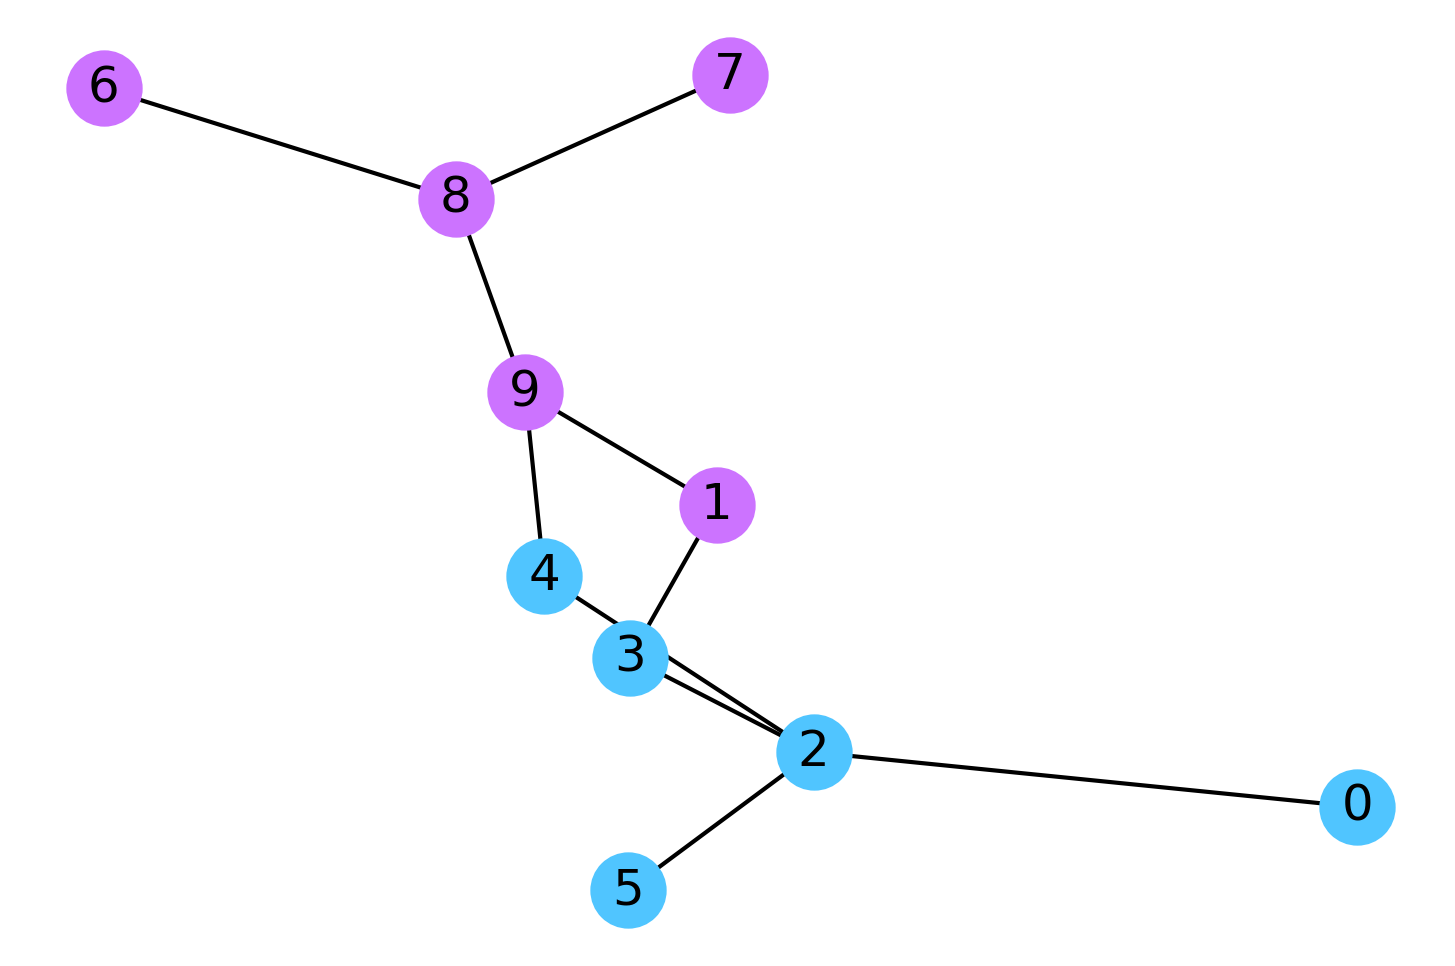

In [7]:
nx.draw_networkx_nodes(G, pos, nodelist=C1, node_color="#CC73FF") # C1 nodes
nx.draw_networkx_nodes(G, pos, nodelist=C2, node_color="#50C5FF") # C2 nodes
nx.draw_networkx_edges(G, pos) # edges
nx.draw_networkx_labels(G, pos) # labels

plt.axis("off")
plt.show()